In [62]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize
import scipy

import sys
sys.path.append('..')
import TwoD_gamma

import brainpy.math as bm
#set default ramndom seed for reproducibility
bm.random.seed(1)
#set backend to cpu
bm.set_platform('cpu')

In [63]:
center_trace, step, mean_fr = TwoD_gamma.get_trace(duration=1e4, sample_rate=20, T_start=1000, visual=False)
w_start = 95
w_size = 160
w_step = 3
cx = 100*center_trace[w_start:(w_start+w_size),0]
cy = 100*center_trace[w_start:(w_start+w_size),1]
st = 100*step[w_start:(w_start+w_size)]
mr = mean_fr[w_start:(w_start+w_size)]
Peaks,_ = scipy.signal.find_peaks(-mr)


10.28040361404419


### 1, plot bump trajectory in the first 3 subplots

/tmp/ipykernel_2078323/3201153350.py:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0 = plt.subplot(gs[:,0])


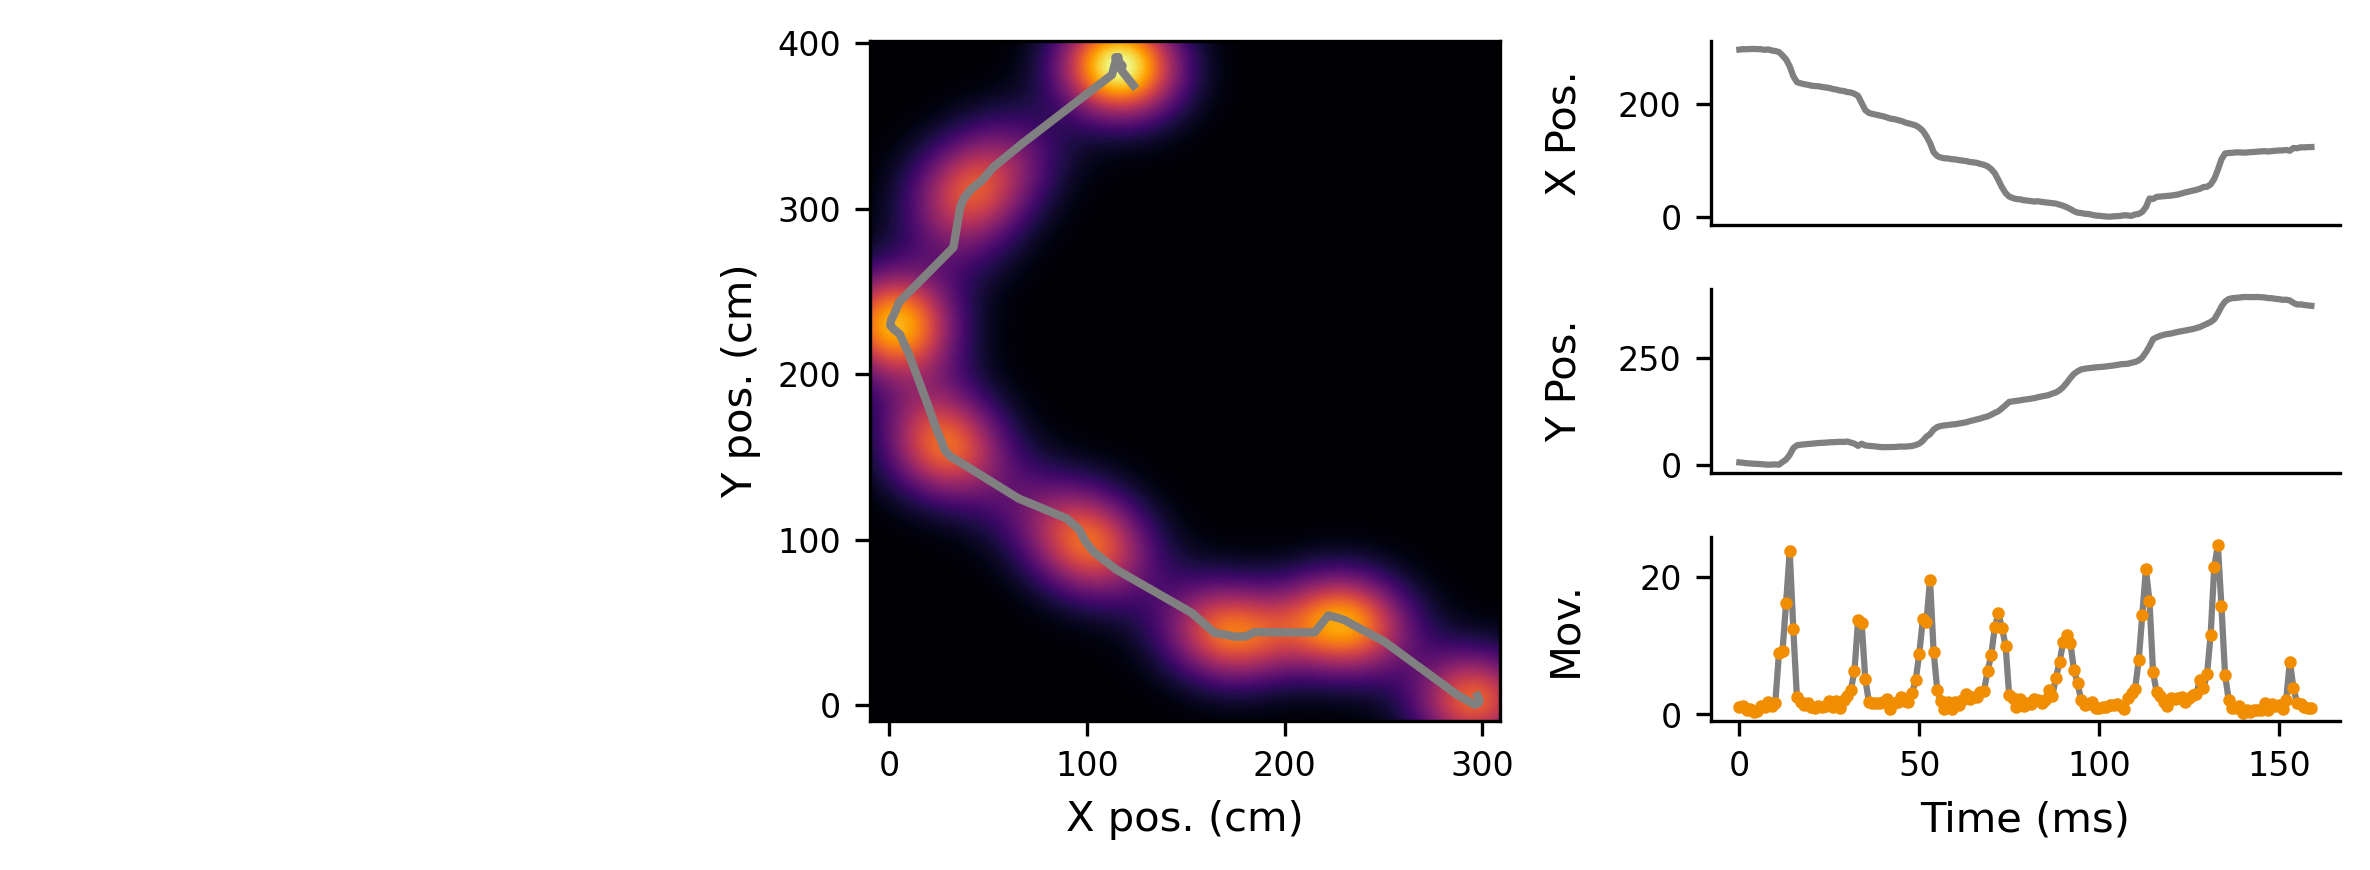

In [114]:
#substract the minimum in cx and cy
cx = cx - np.min(cx)
cy = cy - np.min(cy)

#plot figure 1
x = cx[0:-1:w_step]
y = cy[0:-1:w_step]
size = 128

xx = np.linspace(np.min(x)-10,np.max(cx)+10,size)
yy = np.linspace(np.min(y)-10,np.max(cy)+10,size)
X,Y = np.meshgrid(xx,yy)

fig = plt.subplots(figsize=(8, 3), dpi=300)
gs = gridspec.GridSpec(3, 3, width_ratios=[1,1,1], height_ratios=[1,1,1])

labelsize = 10
ticksize = 8

linecolor = 'grey'

###########
#subplot 0#
###########

ax0 = plt.subplot(gs[:,0])
#empty ax0
ax0.axis('off')
    
# ax0 = plt.subplot(gs[0], projection='3d')
# ax0.set_box_aspect([2, 2, 1])  # Set the aspect ratio to be 1:1:1

# sigma = 40
# # Set the image positions in 3D space
# z = 0  # Set the initial depth
# for i in range(x.shape[0]):
#     if i % 8 == 0:
#         print(i)
#         Z = np.exp((-(X - x[i]) ** 2 - (Y - y[i]) ** 2) / (2 * sigma ** 2))
#         # Normalize your Z values to be in the range [0, 1]
#         norm = Normalize(vmin=Z.min(), vmax=Z.max())
#         # Map Z values to RGBA colors with an alpha channel
#         rgba_colors = plt.cm.inferno(norm(Z))
#         x_, y_ = np.meshgrid(np.linspace(0, 1, Z.shape[1]), np.linspace(0, 1, Z.shape[0]))
#         # Plot the current image with facecolors as RGBA values
#         ax0.plot_surface(x_, y_, z * np.ones_like(x_), facecolors=rgba_colors, rstride=1, cstride=1, antialiased=False)
#         z += 1  # Increment the depth for the next image

# # Set plot ticks labels off
# ax0.set_xticks([])
# ax0.set_yticks([])
# ax0.set_zticks([])

# #axis off
# ax0.axis('off')

# # Show the 3D plot with a different view angle
# ax0.view_init(5, -90, 0)

###########
#subplot 1#
###########

ax1 = plt.subplot(gs[:,1])

#getenrate local bumps as Gaussian contours
sigma = 20
Z = np.zeros((size,size))
for i in range(x.shape[0]):
    Z += np.exp((-(X-x[i])**2-(Y-y[i])**2)/(2*sigma**2))
#plot x and y and set the line color to linecolor
ax1.plot(x, y, color=linecolor, linewidth=2)
ax1.contourf(X, Y, Z, alpha=1, levels=100,cmap='inferno')

#set limits
ax1.set_xlim(np.min(x)-10,np.max(cx)+10)
ax1.set_ylim(np.min(y)-10,np.max(cy)+10)
#add ticks
ax1.set_xticks([0, 100, 200, 300])
ax1.set_yticks([0, 100, 200, 300, 400])
ax1.set_xlabel('X pos. (cm)', fontsize=labelsize)
ax1.set_ylabel('Y pos. (cm)', fontsize=labelsize)

#set tick size
ax1.tick_params(labelsize=ticksize)

###########
#subplot 2#
###########

ax2 = plt.subplot(gs[0,2])
#   
ax2.plot(cx, color=linecolor)
#make the x axis invisible
ax2.axes.xaxis.set_visible(False)
#add y label
ax2.set_ylabel('X Pos.', fontsize=labelsize)
#remove the TOP AND RIGHT axis 
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax3 = plt.subplot(gs[1,2])
ax3.plot(cy, color=linecolor)
#add y label
ax3.set_ylabel('Y Pos.', fontsize=labelsize)
#make the x axis invisible
ax3.axes.xaxis.set_visible(False)
#remove the top and right axis 
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

ax4 = plt.subplot(gs[2,2])
ax4.plot(st, color=linecolor)
ax4.plot(st, color='#F18D00', marker='o', linestyle='None', markersize=2)
#add y label and algin the label to the left
ax4.set_ylabel('Mov.', fontsize=labelsize)
#add x labels
ax4.set_xlabel('Time (ms)', fontsize=labelsize)
#remove top right axis
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)

#set tick size
ax2.tick_params(axis='both', which='major', labelsize=ticksize)
ax3.tick_params(axis='both', which='major', labelsize=ticksize)
ax4.tick_params(axis='both', which='major', labelsize=ticksize)

#align the y labels of ax2 , ax3 and ax4
ax2.yaxis.set_label_coords(-0.2, 0.5)
ax3.yaxis.set_label_coords(-0.2, 0.5)
ax4.yaxis.set_label_coords(-0.2, 0.5)

plt.tight_layout()


#save
plt.savefig('./Fig5_anti_phase_locking_1.pdf', bbox_inches='tight')


In [66]:
#%plot each of the sub figures
#create a folder to save figures
import os
if not os.path.exists('./Fig5a'):
    os.makedirs('./Fig5a')
    
Z = np.zeros((size,size))
for i in range(x.shape[0]):
    if i%8 == 0:
        Z = np.exp((-(X-x[i])**2-(Y-y[i])**2)/(2*sigma**2))
        fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
        ax.contourf(X, Y, Z, alpha=1, levels=100,cmap='inferno')
        #set axis off
        ax.axis('off')
        #save figure to the folder
        plt.savefig('./Fig5a/Fig5a_'+str(i)+'.pdf', bbox_inches='tight')
        #close
        plt.close()

### 2, plot the anti-phase locking of firing rate and step size in the second row subplots

/tmp/ipykernel_2078323/11119199.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "#009FB9" (-> color=(0.0, 0.6235294117647059, 0.7254901960784313, 1.0)). The keyword argument will take precedence.
  ax1.plot(mr, linecolor, color='grey')


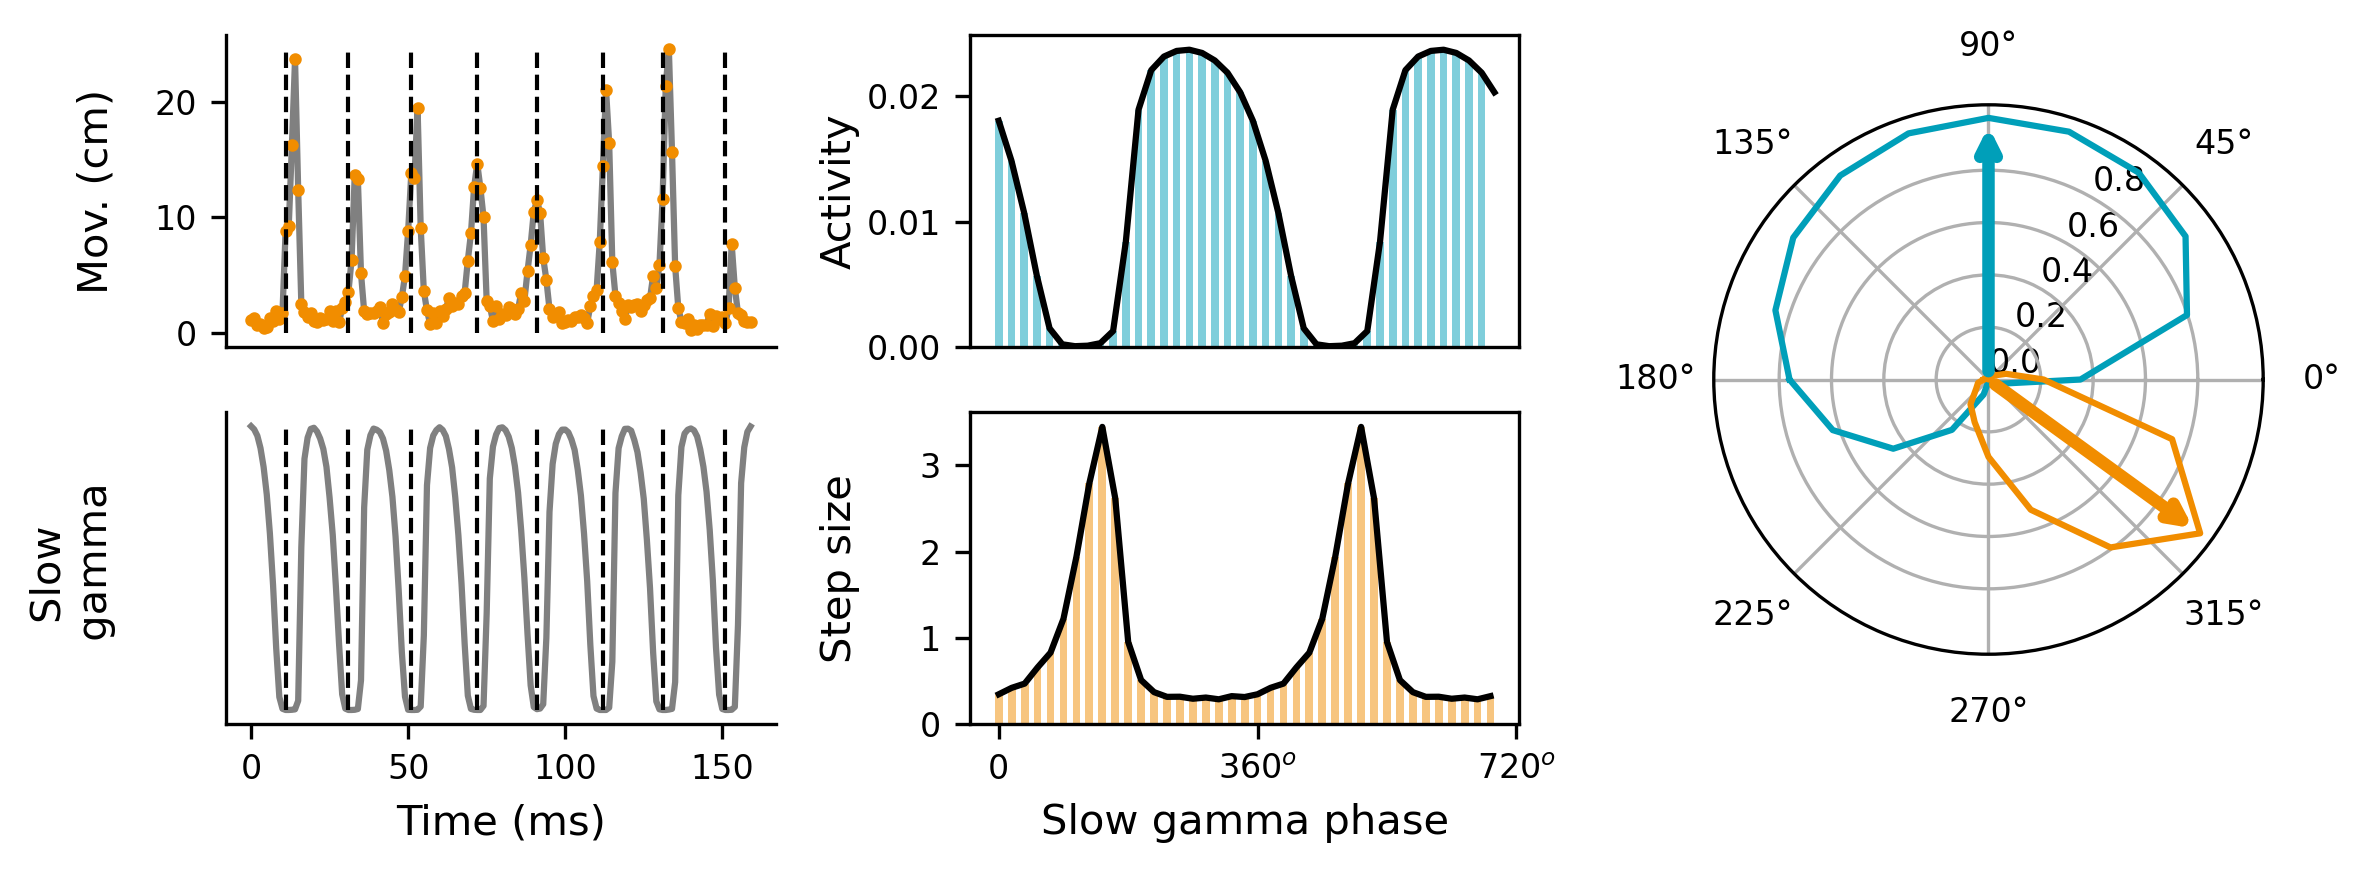

In [113]:
fig = plt.figure(figsize=(8, 3), dpi=300)
gs = gridspec.GridSpec(2, 3, width_ratios=[1,1,1], height_ratios=[1,1])

linecolor = '#009FB9'

###########
#subplot 0#
###########

ax0 = plt.subplot(gs[0,0])

# 在第一个子图中绘制折线图
ax0.plot(st, color='grey')
ax0.plot(st, color='#F18D00', marker='o', linestyle='None', markersize=2)

#add vertical lines
for peaks in Peaks:
    ax0.plot([peaks, peaks],[0,np.max(st)],'k--', linewidth=1)

#set right and top spines invisible
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)    
    
#add ylabel
ax0.set_ylabel('Mov. (cm)', fontsize=labelsize)
    
#add y ticks
ax0.set_yticks([0, 10, 20])
#add y tick labels
ax0.set_yticklabels([0, 10, 20], fontsize=ticksize)
#set xticks off
ax0.set_xticks([])

###########
#subplot 1#
###########

ax1 = plt.subplot(gs[1,0])

ax1.plot(mr, linecolor, color='grey')
for peaks in Peaks:
    ax1.plot([peaks, peaks],[0,np.max(mr)],'k--', linewidth=1)

#set top and right spines invisible
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

#add xlabel and ylabel and chang label to two lines
ax1.set_xlabel('Time (ms)', fontsize=labelsize)
ax1.set_ylabel('Slow \n gamma', fontsize=labelsize)

#set y ticks off for the second subplot
ax1.set_yticks([])
#set x ticks
ax1.set_xticks([0, 50, 100, 150])
#set x tick labels
ax1.set_xticklabels([0, 50, 100, 150], fontsize=ticksize)

#align the ylabels of ax0 and ax1
ax0.yaxis.set_label_coords(-0.2, 0.5)
ax1.yaxis.set_label_coords(-0.2, 0.5)

###########
#subplot 2#
###########

period = int(20)
phase_step = np.zeros(period)
phase_r = np.zeros(period)
phase = np.linspace(-np.pi, np.pi, period+1)[:-1]
for i in range(int(len(mean_fr) / period)):
    for j in range(period):
        phase_step[j] = phase_step[j] + step[i * period + j]
        phase_r[j] = phase_r[j] + mean_fr[i * period + j]

#add another cycle to the end of the trace
phase1 = phase + np.pi
phase2 = phase+3*np.pi
phase_r1 = phase_r
phase_r2 = phase_r
phase_step1 = phase_step
phase_step2 = phase_step

#concate the two cycles
phase12 = np.append(phase1, phase2)
phase_r12 = np.append(phase_r2, phase_r2)
phase_step12 = np.append(phase_step1, phase_step2)

ax2 = plt.subplot(gs[0,1])

ax2.plot(phase12, phase_r12, color='k')
down_sample = 1
ax2.bar(phase12[0:-1:down_sample], phase_r12[0:-1:down_sample], width=1.2*np.pi/period, color='#009FB9', alpha=0.5)  
#add y label
ax2.set_ylabel('Activity', fontsize=labelsize)
#set y ticks to scintific notation
# ax2.set_yticks([0, 0.05])
# ax2.set_yticklabels(['0', '0.05'], fontsize=ticksize)
#set x ticks off
ax2.set_xticks([])
ax2.tick_params(axis='both', which='major', labelsize=ticksize)

###########
#subplot 3#
###########

ax3 = plt.subplot(gs[1,1])

ax3.plot(phase12[0:-1], phase_step12[0:-1], color='k')
ax3.bar(phase12[0:-1:down_sample], phase_step12[0:-1:down_sample], width=1.2*np.pi/period, color='#F18D00', alpha=0.5)
#add y label
ax3.set_ylabel('Step size', fontsize=labelsize)

#add x label
ax3.set_xlabel('Slow gamma phase', fontsize=labelsize)

#add xticks
ax3.set_xticks([0, 2*np.pi, 4*np.pi])
#add xticklabels and yticklabels
ax3.set_xticklabels(['0', '$360^o$', '$720^o$'])
#set x and y tick font size
ax3.tick_params(axis='both', which='major', labelsize=ticksize)

#set y tick and fontszie
# ax3.set_yticks([0, 5, 10])
# ax3.set_yticklabels(['0', '5', '10'], fontsize=ticksize)
#align y labels
ax2.yaxis.set_label_coords(-0.2, 0.5)
ax3.yaxis.set_label_coords(-0.2, 0.5)

###########
#subplot 3#
###########

ax3 = plt.subplot(gs[:,2], projection='polar')

period = 20
phase_step = np.zeros(period)
phase_r = np.zeros(period)
phase = np.linspace(-np.pi, np.pi, period+1)[:-1]
for i in range(int(len(mean_fr) / period)):
    for j in range(period):
        phase_step[j] = phase_step[j] + step[i * period + j]
        phase_r[j] = phase_r[j] + mean_fr[i * period + j]
phase_r = (phase_r-np.min(phase_r))/(np.max(phase_r)-np.min(phase_r))
phase_step = (phase_step-np.min(phase_step))/(np.max(phase_step)-np.min(phase_step))

phase = np.append(phase, phase[0])
phase_r = np.append(phase_r, phase_r[0])
phase_step = np.append(phase_step, phase_step[0])

#%%
ax3.plot(phase, phase_r, color='#009FB9')
ax3.plot(phase, phase_step, color='#F18D00')

#calculate peak phase_r and phase_step
peak_phase_r = phase[np.argmax(phase_r)]
peak_phase_step = phase[np.argmax(phase_step)]

#add arrows representing the peak phase_r and phase_step
#pointing from the center to the peak, make the arrow thicker with a arrow style ->
#using annotate function
ax3.annotate("", xy=(peak_phase_r, 1), xytext=(0, 0), arrowprops=dict(arrowstyle="->", color='#009FB9', linewidth=3))
ax3.annotate("", xy=(peak_phase_step, 1), xytext=(0, 0), arrowprops=dict(arrowstyle="->", color='#F18D00', linewidth=3))
#add grid
ax3.grid(True)

#set tick size
ax3.tick_params(labelsize=ticksize)
ax3.set_rticks([0, 0.2, 0.4, 0.6, 0.8])
#reduce rticks size
for label in ax3.get_yticklabels():
    label.set_fontsize(ticksize)
ax3.set_rlabel_position(60)

plt.tight_layout()

#save
plt.savefig('./Fig5_anti_phase_locking_2.pdf', bbox_inches='tight')

In [97]:
phase

array([-3.14159265, -2.82743339, -2.51327412, -2.19911486, -1.88495559,
       -1.57079633, -1.25663706, -0.9424778 , -0.62831853, -0.31415927,
        0.        ,  0.31415927,  0.62831853,  0.9424778 ,  1.25663706,
        1.57079633,  1.88495559,  2.19911486,  2.51327412,  2.82743339,
       -3.14159265])

In [98]:
phase_step

array([0.01851358, 0.04207858, 0.05761705, 0.1169935 , 0.17125669,
       0.2957688 , 0.52332316, 0.7933827 , 1.        , 0.73785131,
       0.21051271, 0.07060977, 0.02629188, 0.00899784, 0.00948134,
       0.00207061, 0.00643704, 0.        , 0.01164912, 0.00834162,
       0.01851358])